# Análisis de ventas de tiendas Walmart

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = (
    SparkSession.builder
    .appName("pyspark-walmart")
    .config("spark.driver.memory", "512m")
    .config("spark.driver.cores", "1")
    .config("spark.executor.memory", "512m")
    .config("spark.executor.cores", "1")
    .config("spark.sql.shuffle.partitions", "2")
    .getOrCreate()
)

In [3]:
spark.version

'2.4.5'

In [6]:
#Carga de dataset

dff = spark.read.csv('/dataset/Walmart.csv', header=True)

In [7]:
dff.show(10)

+-----+----------+------------+------------+-----------+----------+-----------+------------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+-----+----------+------------+------------+-----------+----------+-----------+------------+
|    1|05-02-2010|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|
|    1|12-02-2010|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|
|    1|19-02-2010|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|
|    1|26-02-2010|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|
|    1|05-03-2010|  1554806.68|           0|       46.5|     2.625|211.3501429|       8.106|
|    1|12-03-2010|  1439541.59|           0|      57.79|     2.667|211.3806429|       8.106|
|    1|19-03-2010|  1472515.79|           0|      54.58|      2.72| 211.215635|       8.106|
|    1|26-03-2010|  1404429.92|           0|      51.45|     2.732|211

In [8]:
#Conocer el esquema de cada columna de dataset

dff.printSchema()

root
 |-- Store: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: string (nullable = true)
 |-- Holiday_Flag: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- Fuel_Price: string (nullable = true)
 |-- CPI: string (nullable = true)
 |-- Unemployment: string (nullable = true)



In [9]:
#Visualización del formato de la fecha

dff.select("Date").show()

+----------+
|      Date|
+----------+
|05-02-2010|
|12-02-2010|
|19-02-2010|
|26-02-2010|
|05-03-2010|
|12-03-2010|
|19-03-2010|
|26-03-2010|
|02-04-2010|
|09-04-2010|
|16-04-2010|
|23-04-2010|
|30-04-2010|
|07-05-2010|
|14-05-2010|
|21-05-2010|
|28-05-2010|
|04-06-2010|
|11-06-2010|
|18-06-2010|
+----------+
only showing top 20 rows



In [10]:
#Transformación de datos

from pyspark.sql.functions import to_date,col

dff = dff.withColumn("Date",to_date("Date","dd-MM-yyyy"))

from pyspark.sql.types import IntegerType, DoubleType, FloatType

dff = dff.withColumn('Store', dff['Store'].cast(IntegerType()))
dff = dff.withColumn('Weekly_Sales', dff['Weekly_Sales'].cast(IntegerType()))
dff = dff.withColumn('Holiday_Flag', dff['Holiday_Flag'].cast(DoubleType()))
dff = dff.withColumn('Temperature', dff['Temperature'].cast(DoubleType()))
dff = dff.withColumn('Fuel_Price', dff['Fuel_Price'].cast(DoubleType()))
dff = dff.withColumn('CPI', dff['CPI'].cast(DoubleType()))
dff = dff.withColumn('Unemployment', dff['Unemployment'].cast(DoubleType()))

In [11]:
#Esquema corregido

dff.printSchema()

root
 |-- Store: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Weekly_Sales: integer (nullable = true)
 |-- Holiday_Flag: double (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- CPI: double (nullable = true)
 |-- Unemployment: double (nullable = true)



In [12]:
dff.show(10)

+-----+----------+------------+------------+-----------+----------+-----------+------------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+-----+----------+------------+------------+-----------+----------+-----------+------------+
|    1|2010-02-05|     1643690|         0.0|      42.31|     2.572|211.0963582|       8.106|
|    1|2010-02-12|     1641957|         1.0|      38.51|     2.548|211.2421698|       8.106|
|    1|2010-02-19|     1611968|         0.0|      39.93|     2.514|211.2891429|       8.106|
|    1|2010-02-26|     1409727|         0.0|      46.63|     2.561|211.3196429|       8.106|
|    1|2010-03-05|     1554806|         0.0|       46.5|     2.625|211.3501429|       8.106|
|    1|2010-03-12|     1439541|         0.0|      57.79|     2.667|211.3806429|       8.106|
|    1|2010-03-19|     1472515|         0.0|      54.58|      2.72| 211.215635|       8.106|
|    1|2010-03-26|     1404429|         0.0|      51.45|     2.732|211

In [13]:
dff.count()

6435

In [14]:
len(dff.columns)

8

In [15]:
dff.summary().show()

+-------+------------------+-----------------+-------------------+------------------+-------------------+-----------------+------------------+
|summary|             Store|     Weekly_Sales|       Holiday_Flag|       Temperature|         Fuel_Price|              CPI|      Unemployment|
+-------+------------------+-----------------+-------------------+------------------+-------------------+-----------------+------------------+
|  count|              6435|             6435|               6435|              6435|               6435|             6435|              6435|
|   mean|              23.0|1046964.386013986|0.06993006993006994| 60.66378243978229|  3.358606837606832|171.5783938487799| 7.999151048951067|
| stddev|12.988182381175454|564366.6212906983| 0.2550489443698279|18.444932875811585|0.45901970719285223|39.35671229566419|1.8758847818627944|
|    min|                 1|           209986|                0.0|             -2.06|              2.472|          126.064|             3.879|

In [16]:
#Cantidad de semanas con días festivos

dff.groupBy("Holiday_Flag").count().show()

+------------+-----+
|Holiday_Flag|count|
+------------+-----+
|         1.0|  450|
|         0.0| 5985|
+------------+-----+



In [17]:
#Cantidad total de ventas

dff.groupBy().sum("Weekly_Sales").show()

+-----------------+
|sum(Weekly_Sales)|
+-----------------+
|       6737215824|
+-----------------+



In [18]:
#Ventas totales por tienda

dff.groupBy('Store').sum('Weekly_Sales').orderBy('Store').show(20)

+-----+-----------------+
|Store|sum(Weekly_Sales)|
+-----+-----------------+
|    1|        222402734|
|    2|        275382373|
|    3|         57586666|
|    4|        299543881|
|    5|         45475617|
|    6|        223756059|
|    7|         81598205|
|    8|        129951115|
|    9|         77789152|
|   10|        271617645|
|   11|        193962721|
|   12|        144287160|
|   13|        286517633|
|   14|        288999841|
|   15|         89133609|
|   16|         74252354|
|   17|        127782072|
|   18|        155114667|
|   19|        206634794|
|   20|        301397719|
+-----+-----------------+
only showing top 20 rows



In [19]:
#Ventas totales por tienda ordenadas de menor a mayor venta

dff.groupBy('Store').agg({"Weekly_Sales": "avg", "Weekly_Sales": "sum"}).sort('sum(Weekly_Sales)').show()

+-----+-----------------+
|Store|sum(Weekly_Sales)|
+-----+-----------------+
|   33|         37160150|
|   44|         43293023|
|    5|         45475617|
|   36|         53412139|
|   38|         55159554|
|    3|         57586666|
|   30|         62716810|
|   37|         74202669|
|   16|         74252354|
|   29|         77141487|
|    9|         77789152|
|   42|         79565685|
|    7|         81598205|
|   15|         89133609|
|   43|         90565366|
|   25|        101061103|
|   21|        108117810|
|   45|        112395273|
|   17|        127782072|
|    8|        129951115|
+-----+-----------------+
only showing top 20 rows



In [20]:
#Ventas totales por tienda ordenadas de mayor a menor venta

stores = dff.groupby('Store').sum('Weekly_Sales').orderBy('Store')
stores.orderBy(stores['sum(Weekly_Sales)'].desc()).show(truncate=False)
type(stores)

+-----+-----------------+
|Store|sum(Weekly_Sales)|
+-----+-----------------+
|20   |301397719        |
|4    |299543881        |
|14   |288999841        |
|13   |286517633        |
|2    |275382373        |
|10   |271617645        |
|27   |253855845        |
|6    |223756059        |
|1    |222402734        |
|39   |207445467        |
|19   |206634794        |
|31   |199613839        |
|23   |198750546        |
|24   |194015953        |
|11   |193962721        |
|28   |189263612        |
|41   |181341863        |
|32   |166819177        |
|18   |155114667        |
|22   |147075580        |
+-----+-----------------+
only showing top 20 rows



pyspark.sql.dataframe.DataFrame

In [21]:
stores.show()

+-----+-----------------+
|Store|sum(Weekly_Sales)|
+-----+-----------------+
|    1|        222402734|
|    2|        275382373|
|    3|         57586666|
|    4|        299543881|
|    5|         45475617|
|    6|        223756059|
|    7|         81598205|
|    8|        129951115|
|    9|         77789152|
|   10|        271617645|
|   11|        193962721|
|   12|        144287160|
|   13|        286517633|
|   14|        288999841|
|   15|         89133609|
|   16|         74252354|
|   17|        127782072|
|   18|        155114667|
|   19|        206634794|
|   20|        301397719|
+-----+-----------------+
only showing top 20 rows



In [24]:
Stores_pd = stores.toPandas()
Stores_pd

,Store,sum(Weekly_Sales)
0,1,222402734
1,2,275382373
2,3,57586666
3,4,299543881
4,5,45475617
5,6,223756059
6,7,81598205
7,8,129951115
8,9,77789152
9,10,271617645


In [25]:
type(Stores_pd)

pandas.core.frame.DataFrame

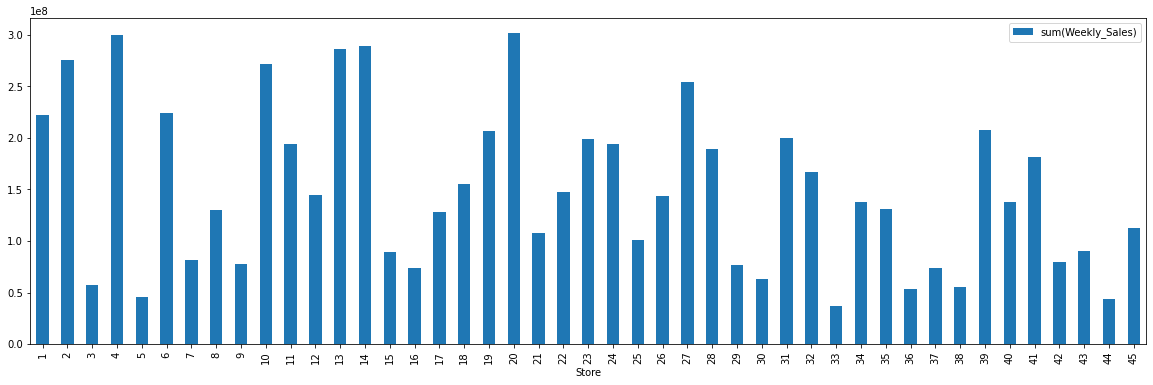

In [26]:
#Gráfico de barras de ventas totales para cada tienda

import matplotlib.pyplot as plt
%matplotlib inline

Stores_pd.plot.bar(x='Store', y='sum(Weekly_Sales)', figsize=(20,6))

In [27]:
#Ventas totales por semana

dff.groupby('Date').sum('Weekly_Sales').orderBy('Date').show(10)

+----------+-----------------+
|      Date|sum(Weekly_Sales)|
+----------+-----------------+
|2010-02-05|         49750719|
|2010-02-12|         48336654|
|2010-02-19|         48276973|
|2010-02-26|         43968550|
|2010-03-05|         46871448|
|2010-03-12|         45925374|
|2010-03-19|         44988954|
|2010-03-26|         44133937|
|2010-04-02|         50423809|
|2010-04-09|         47365270|
+----------+-----------------+
only showing top 10 rows



In [28]:
semana = dff.groupBy('Date').sum('Weekly_Sales').orderBy('Date')

In [29]:
semana_pd = semana.toPandas()

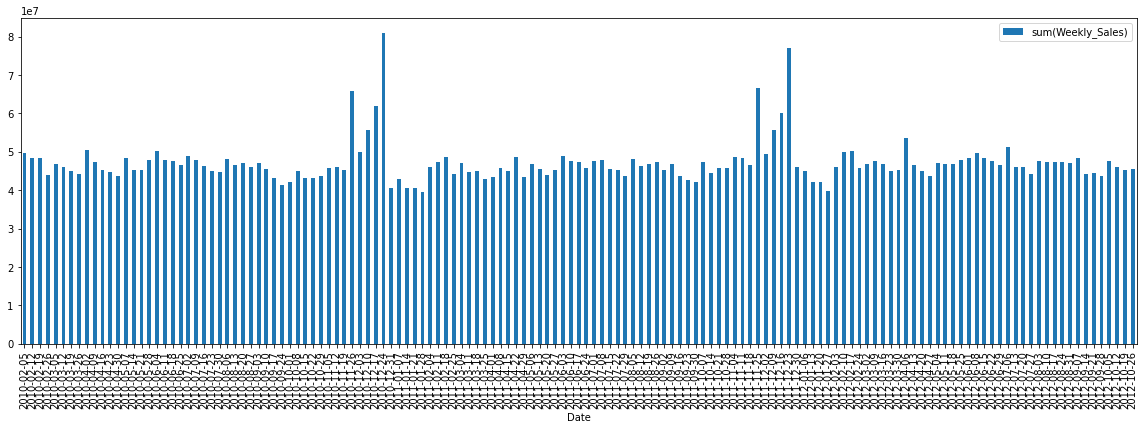

In [30]:
#Gráfico de barras de ventas totales por semana

import matplotlib.pyplot as plt
%matplotlib inline

semana_pd.plot.bar(x='Date', y='sum(Weekly_Sales)', figsize=(20,6))

In [31]:
#Ingeniería de atributos: extración del año y mes de la columna date

from pyspark.sql.functions import date_format

dff = dff.withColumn("Year",date_format("Date","yyyy")).withColumn("Month",date_format("Date","MM"))

dff.show(5)

+-----+----------+------------+------------+-----------+----------+-----------+------------+----+-----+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|Year|Month|
+-----+----------+------------+------------+-----------+----------+-----------+------------+----+-----+
|    1|2010-02-05|     1643690|         0.0|      42.31|     2.572|211.0963582|       8.106|2010|   02|
|    1|2010-02-12|     1641957|         1.0|      38.51|     2.548|211.2421698|       8.106|2010|   02|
|    1|2010-02-19|     1611968|         0.0|      39.93|     2.514|211.2891429|       8.106|2010|   02|
|    1|2010-02-26|     1409727|         0.0|      46.63|     2.561|211.3196429|       8.106|2010|   02|
|    1|2010-03-05|     1554806|         0.0|       46.5|     2.625|211.3501429|       8.106|2010|   03|
+-----+----------+------------+------------+-----------+----------+-----------+------------+----+-----+
only showing top 5 rows



In [32]:
#Ventas totales por año

dff.groupBy('Year').sum('Weekly_Sales').orderBy('Year').show()

+----+-----------------+
|Year|sum(Weekly_Sales)|
+----+-----------------+
|2010|       2288885060|
|2011|       2448198853|
|2012|       2000131911|
+----+-----------------+



In [33]:
from pyspark.sql import functions as F

dff = dff.withColumn("yearday",F.dayofyear(F.col("Date"))).withColumn('WeekOfYear',F.weekofyear(F.col('Date')))

dff.show(5)

+-----+----------+------------+------------+-----------+----------+-----------+------------+----+-----+-------+----------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|Year|Month|yearday|WeekOfYear|
+-----+----------+------------+------------+-----------+----------+-----------+------------+----+-----+-------+----------+
|    1|2010-02-05|     1643690|         0.0|      42.31|     2.572|211.0963582|       8.106|2010|   02|     36|         5|
|    1|2010-02-12|     1641957|         1.0|      38.51|     2.548|211.2421698|       8.106|2010|   02|     43|         6|
|    1|2010-02-19|     1611968|         0.0|      39.93|     2.514|211.2891429|       8.106|2010|   02|     50|         7|
|    1|2010-02-26|     1409727|         0.0|      46.63|     2.561|211.3196429|       8.106|2010|   02|     57|         8|
|    1|2010-03-05|     1554806|         0.0|       46.5|     2.625|211.3501429|       8.106|2010|   03|     64|         9|
+-----+---------

In [34]:
dff.groupBy('Year', 'Month' ).sum('Weekly_Sales').orderBy('Year', 'Month').show(5)

+----+-----+-----------------+
|Year|Month|sum(Weekly_Sales)|
+----+-----+-----------------+
|2010|   02|        190332896|
|2010|   03|        181919713|
|2010|   04|        231412255|
|2010|   05|        186710847|
|2010|   06|        192246083|
+----+-----+-----------------+
only showing top 5 rows



In [36]:
ventas_año = dff.groupBy('Year', 'Month').sum('Weekly_Sales').orderBy('Year', 'Month')

ventas_año_pd = ventas_año.toPandas()

In [37]:
ventas_año_pd

,Year,Month,sum(Weekly_Sales)
0,2010,02,190332896
1,2010,03,181919713
2,2010,04,231412255
3,2010,05,186710847
4,2010,06,192246083
5,2010,07,232580013
6,2010,08,187640024
7,2010,09,177267805
8,2010,10,217161716
9,2010,11,202853279


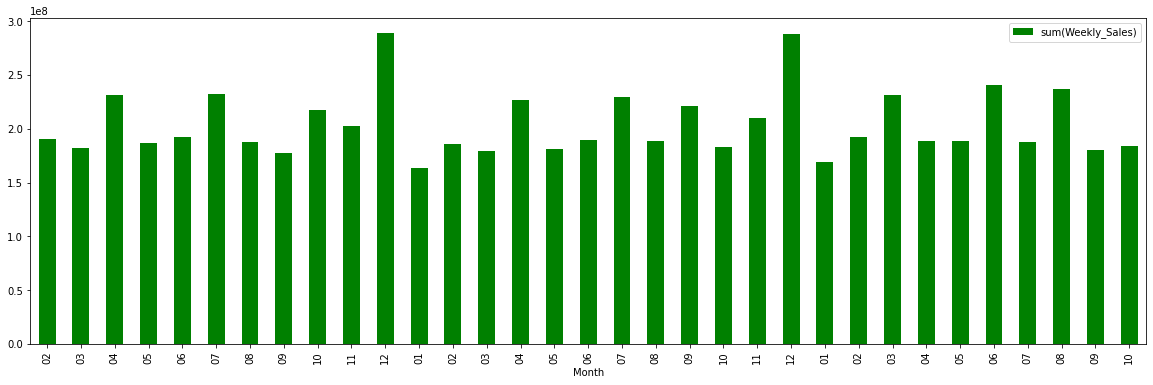

In [38]:
ventas_año_pd.plot.bar(x='Month', y='sum(Weekly_Sales)', color ='green', figsize=(20,6) )

In [40]:
spark.stop()